In [1]:
import sys
print(sys.version)

3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:40:08) [MSC v.1938 64 bit (AMD64)]


In [ ]:
# Require python 3.10
#pip install torch torchvision transformers sentencepiece accelerate
#
#llama model list
##llama download --source meta --model-id CHOSEN_MODEL_ID
#llama download --source meta --model-id Llama3.2-3B-Instruct:int4-qlora-eo8
#pip install torch fairscale fire blobfile
## verifying download 
#llama model verify-download --model-id Llama3.2-3B-Instruct:int4-qlora-eo8
#
## Setting env variable 
#$env:CHECKPOINT_DIR = "C:\Users\Zunaira\.llama\checkpoints\Meta-Llama3.2-3B-Instruct"


# following "https://python.langchain.com/docs/integrations/llms/ollama/"



# <span style="color:yellow">RAG</span>


## Commands on Command Line </br>
1. cd C:\Users\Zunaira\AppData\Local\Programs\Ollama<\br>
2. ollama list 
3. ollama pull llama3
4. ollama run llama3:latest
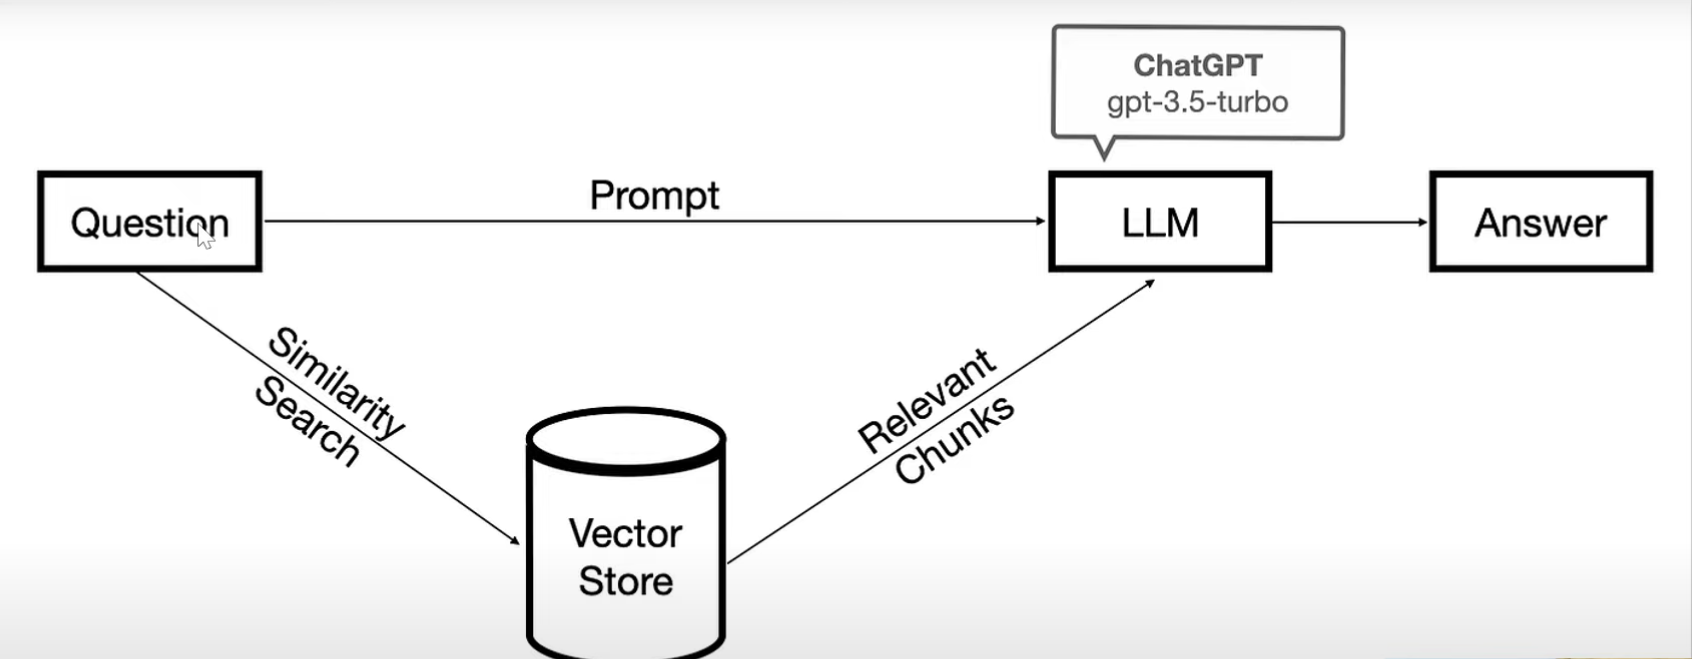
5. pip install -r requirements.txt (works with python 3.10) 
6. 


## Dataset - https://www.kaggle.com/datasets/thedevastator/comprehensive-medical-q-a-dataset


## <span style= "color : #0be633"> Loading Dataset</span>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/comprehensive-medical-q-a-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.89M/4.89M [00:02<00:00, 2.43MB/s]

Extracting files...
Path to dataset files: C:\Users\Zunaira\.cache\kagglehub\datasets\thedevastator\comprehensive-medical-q-a-dataset\versions\2


## <span style= "color : #0be633"> Analyzing Dataset</span>

In [20]:
import os

# Print all files in the downloaded dataset directory
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


C:\Users\Zunaira\.cache\kagglehub\datasets\thedevastator\comprehensive-medical-q-a-dataset\versions\2\train.csv


In [22]:
import pandas as pd

# Load the first CSV file (replace with the actual file name)
csv_file = os.path.join(path, 'train.csv')
df = pd.read_csv(csv_file)

# Display the first few rows and columns
print(df.head())
print(df.info())  # View column data types and non-null counts
print(df.describe())  # Get statistical summary for numerical columns


             qtype                                           Question  \
0   susceptibility  Who is at risk for Lymphocytic Choriomeningiti...   
1         symptoms  What are the symptoms of Lymphocytic Choriomen...   
2   susceptibility  Who is at risk for Lymphocytic Choriomeningiti...   
3  exams and tests  How to diagnose Lymphocytic Choriomeningitis (...   
4        treatment  What are the treatments for Lymphocytic Chorio...   

                                              Answer  
0  LCMV infections can occur after exposure to fr...  
1  LCMV is most commonly recognized as causing ne...  
2  Individuals of all ages who come into contact ...  
3  During the first phase of the disease, the mos...  
4  Aseptic meningitis, encephalitis, or meningoen...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16407 entries, 0 to 16406
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   qtype     16407 non-null  object
 1   Ques

In [23]:
print(df.columns)


Index(['qtype', 'Question', 'Answer'], dtype='object')


In [24]:
print(df.isnull().sum())


qtype       0
Question    0
Answer      0
dtype: int64


In [25]:
print(df.duplicated().sum())


48


In [26]:
print(df.dtypes)


qtype       object
Question    object
Answer      object
dtype: object


In [28]:
print(df['Question'].head())
print(df['Answer'].head())


0    Who is at risk for Lymphocytic Choriomeningiti...
1    What are the symptoms of Lymphocytic Choriomen...
2    Who is at risk for Lymphocytic Choriomeningiti...
3    How to diagnose Lymphocytic Choriomeningitis (...
4    What are the treatments for Lymphocytic Chorio...
Name: Question, dtype: object
0    LCMV infections can occur after exposure to fr...
1    LCMV is most commonly recognized as causing ne...
2    Individuals of all ages who come into contact ...
3    During the first phase of the disease, the mos...
4    Aseptic meningitis, encephalitis, or meningoen...
Name: Answer, dtype: object


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns



# Count plot for a categorical column
sns.countplot(x='qtype', data=df)
plt.show()


C:\Users\Zunaira\AppData\Local\Temp\ipykernel_1464\2716329898.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


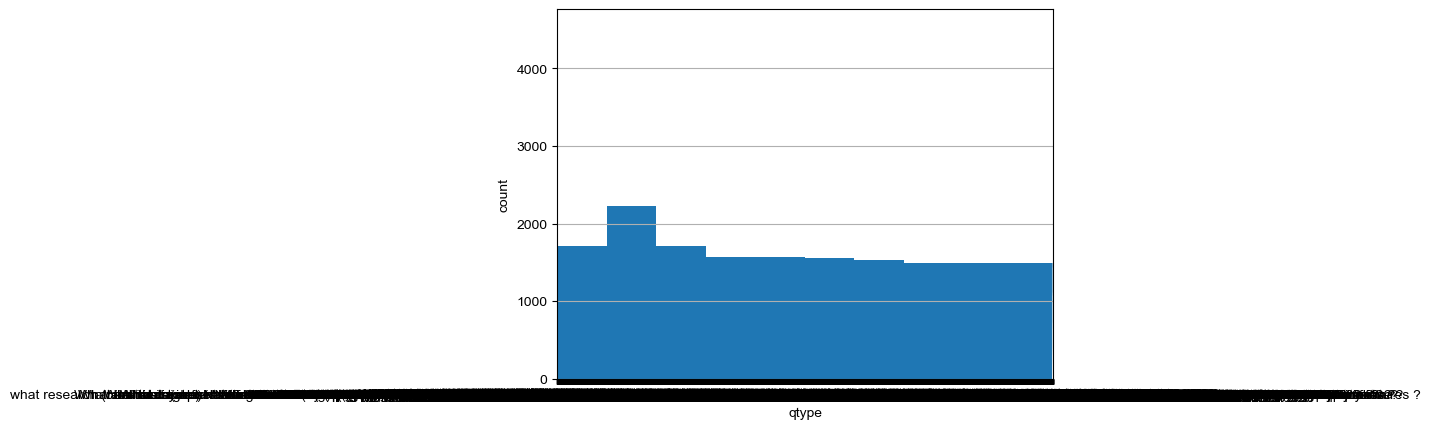

In [ ]:
# visualizing dataset 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
# Count plot for a categorical column
sns.countplot(x='qtype', data=df)
plt.show()


In [18]:
from dotenv import load_dotenv
import os 
from langchain_community.llms import Ollama
from langchain_openai.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import TextLoader
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.runnables import RunnablePassthrough, RunnableParallel
import streamlit as st 

1. pip install -U langchain-ollama


In [12]:
from langchain_ollama import OllamaLLM

ollama_llm = OllamaLLM(model='llama3')


In [13]:
import langchain_ollama
print("LangChain-Ollama package imported successfully.")


LangChain-Ollama package imported successfully.


In [16]:
# make sure its running before running this code 
ollama_llm = Ollama(model = 'llama3')
print (ollama_llm.invoke("what is anemia", stop = ['<|eot_id|>']))

Anemia is a medical condition characterized by a decrease in the number of red blood cells or the amount of hemoglobin in the blood. Hemoglobin is a protein in red blood cells that carries oxygen to different parts of the body.

There are three main types of anemia:

1. **Iron-deficiency anemia**: This type occurs when the body doesn't have enough iron, which is necessary for the production of hemoglobin.
2. **Vitamin deficiency anemia**: This type results from a lack of essential vitamins like vitamin B12 or folate, which are needed to produce red blood cells.
3. **Anemia caused by chronic disease**: This type occurs when a underlying medical condition, such as kidney disease, cancer, or rheumatoid arthritis, damages the bone marrow's ability to produce red blood cells.

Common causes of anemia include:

1. **Iron deficiency**: Not getting enough iron from your diet or having excessive menstrual bleeding.
2. **Vitamin deficiencies**: Lack of vitamin B12 or folate in the diet.
3. **Chr

In [15]:
ollama_llm.invoke('what is a bot')

'A bot (short for "robot") is a software application that automates specific tasks or processes, often by interacting with users through text or voice interfaces. Bots can be integrated into various platforms, such as messaging apps, websites, and virtual assistants.\n\nHere are some key characteristics of bots:\n\n1. **Automation**: Bots automate repetitive or mundane tasks, freeing up humans to focus on more complex or creative work.\n2. **Intelligence**: Bots use algorithms, machine learning, or natural language processing (NLP) to understand and respond to user input.\n3. **Interaction**: Bots interact with users through various interfaces, such as:\n\t* Text-based: messaging apps like Facebook Messenger, WhatsApp, or Slack\n\t* Voice-based: virtual assistants like Amazon Alexa, Google Assistant, or Siri\n\t* Graphical: graphical user interfaces (GUIs) or web applications\n4. **Programming**: Bots are programmed to perform specific tasks, such as:\n\t* Answering questions or provid

Generated key from open ai website and entered into .env file 

In [10]:
gpt_llm.invoke('what is a bot')

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

# ---------------------------- GPT WALA CODE ---------------------------- #

In [ ]:
#pip install llama-stack


In [4]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer


In [6]:
model_id = "C:\\Users\\Zunaira\\.llama\\checkpoints\\Llama3.2-3B-Instruct-int4-qlora-eo8"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id, 
    torch_dtype=torch.float16,  # Use float16 for efficiency
    device_map="auto"          # Automatically assign model to available devices (CPU/GPU)
)


OSError: C:\Users\Zunaira\.llama\checkpoints\Llama3.2-3B-Instruct-int4-qlora-eo8 does not appear to have a file named config.json. Checkout 'https://huggingface.co/C:\Users\Zunaira\.llama\checkpoints\Llama3.2-3B-Instruct-int4-qlora-eo8/tree/None' for available files.

In [ ]:
prompt = "Explain the concept of machine learning."
inputs = tokenizer(prompt, return_tensors="pt")

# Generate output
outputs = model.generate(inputs.input_ids, max_length=100, num_return_sequences=1)
response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(response)


In [ ]:
#!/bin/bash

#CHECKPOINT_DIR=~/.llama/checkpoints/Meta-Llama3.1-8B-Instruct
#PYTHONPATH=$(git rev-parse --show-toplevel) torchrun llama_models/scripts/example_chat_completion.py $CHECKPOINT_DIR

SyntaxError: invalid decimal literal (2685098049.py, line 3)